In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure and content
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [6]:
# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

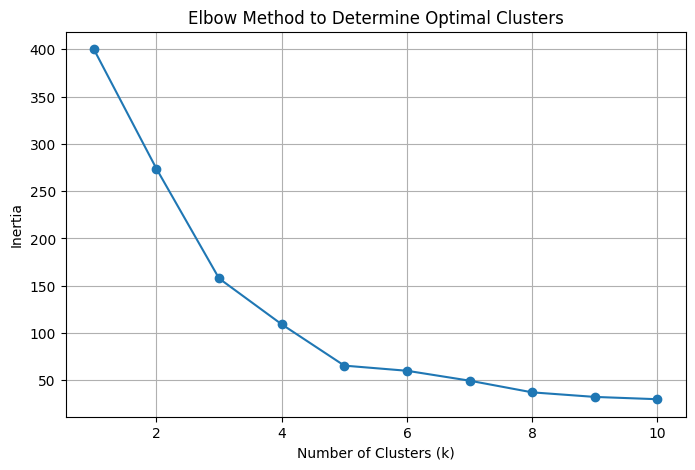

In [7]:
# Plot the elbow curve to find the "knee point"
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [8]:
# Apply K-means with the chosen optimal number of clusters (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [9]:
# Add the cluster labels to the original dataset
data['Cluster'] = clusters

In [10]:
# Perform descriptive analysis of each cluster
cluster_analysis = data.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
})
print("Descriptive Analysis of Clusters:\n", cluster_analysis)


Descriptive Analysis of Clusters:
                Age            Annual Income (k$)             \
              mean        std               mean        std   
Cluster                                                       
0        42.716049  16.447822          55.296296   8.988109   
1        32.692308   3.728650          86.538462  16.312485   
2        25.272727   5.257030          25.727273   7.566731   
3        41.114286  11.341676          88.200000  16.399067   
4        45.217391  13.228607          26.304348   7.893811   

        Spending Score (1-100)             
                          mean        std  
Cluster                                    
0                    49.518519   6.530909  
1                    82.128205   9.364489  
2                    79.363636  10.504174  
3                    17.114286   9.952154  
4                    20.913043  13.017167  


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

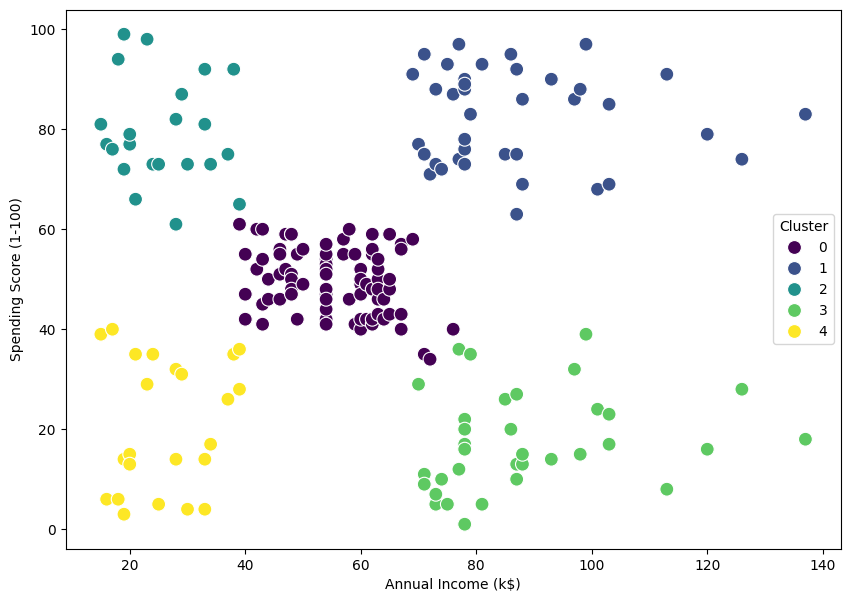

In [11]:
# Enhanced visualization of clusters using Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='viridis',
    s=100  # Marker size
)

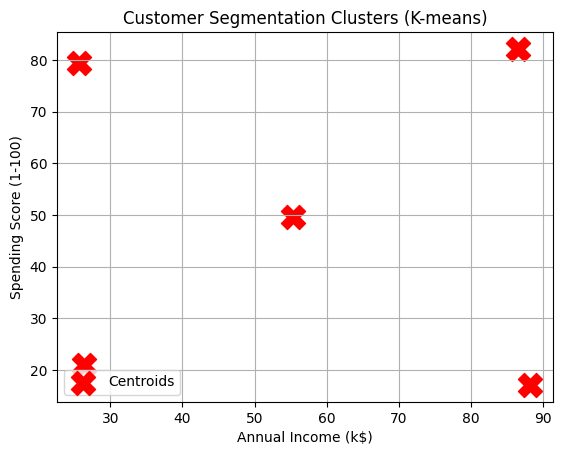

In [12]:
# Add centroids to the plot
centroids = kmeans.cluster_centers_ * scaler.scale_ + scaler.mean_  # Rescale centroids to original scale
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segmentation Clusters (K-means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Export the clustered data to a CSV file
data.to_csv('Clustered_Customers.csv', index=False)
print("The results with clusters have been exported to 'Clustered_Customers.csv'.")

The results with clusters have been exported to 'Clustered_Customers.csv'.
